Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Parameters: {'var_smoothing': 0.001}
Training Accuracy: 0.9277707766797109
Testing Accuracy: 0.9278861033735686


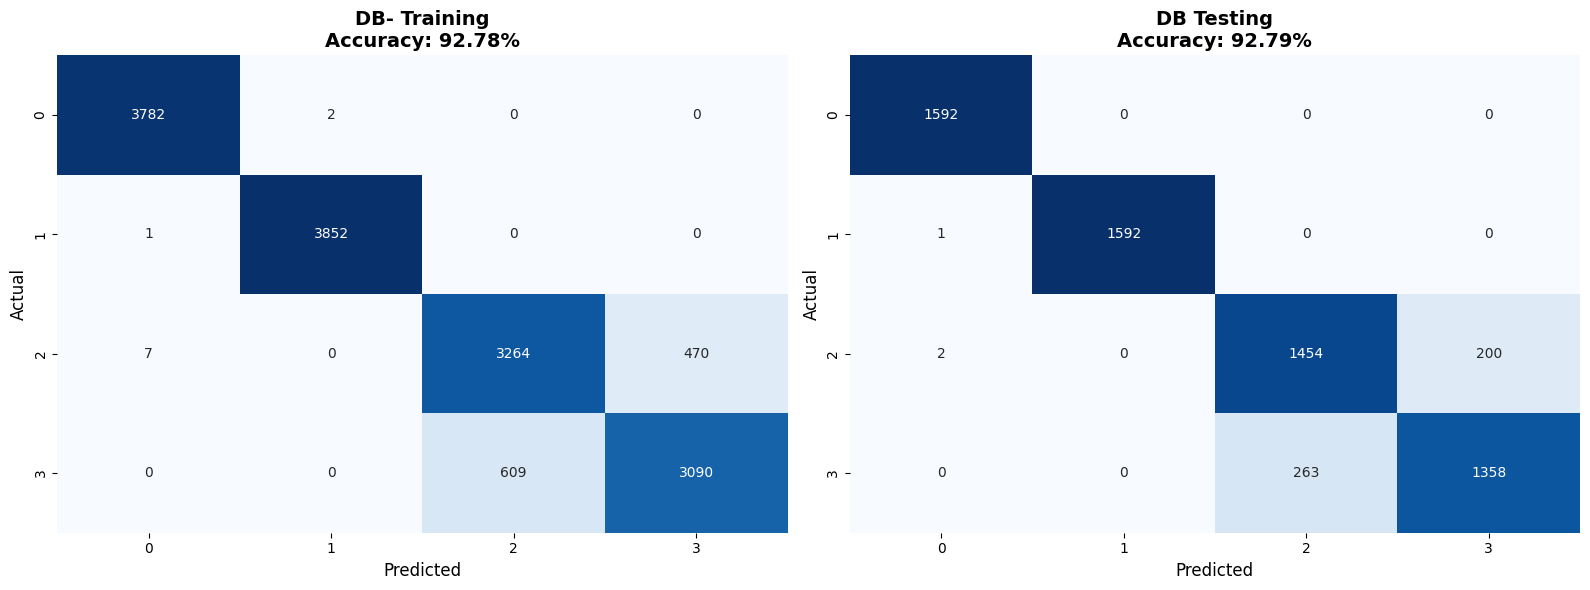

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data.csv')

# Separate the features and target variable
X = data.drop(columns=['Target'])
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Set up the hyperparameter grid
param_grid = {
    'var_smoothing': [1e-3]  # You can adjust these values
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_nb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predictions on training and testing data
y_train_pred = best_nb_model.predict(X_train_scaled)
y_test_pred = best_nb_model.predict(X_test_scaled)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Confusion matrices
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print accuracies
print(f"Best Parameters: {best_params}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Plot confusion matrices with headings
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training confusion matrix
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title(f"DB- Training\nAccuracy: {train_accuracy:.2%}", fontsize=14, weight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

# Testing confusion matrix
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title(f"DB Testing\nAccuracy: {test_accuracy:.2%}", fontsize=14, weight='bold')
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_xlabel('Predicted', fontsize=12)

plt.tight_layout()
plt.show()